# Trần Thành Tâm: Mã hóa - Chuẩn hóa dữ liệu & Phân tích mối tương quan 


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

In [13]:
df = pd.read_csv("dataset_cleaned.csv")

In [15]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])


Số dòng: 113999
Số cột: 21


In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [20]:
print("Tên các cột:", df.columns.tolist())

Tên các cột: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


### Mã hóa dữ liệu dạng chuỗi (Label Encoding)

In [18]:
label_artist = LabelEncoder()
label_genre = LabelEncoder()

In [21]:
df['artist_encoded'] = label_artist.fit_transform(df['artists'].fillna('Unknown').astype(str))
df['genre_encoded']  = label_genre.fit_transform(df['track_genre'].fillna('Unknown').astype(str))


In [23]:
df[['artists', 'artist_encoded', 'track_genre', 'genre_encoded']].head()


,artists,artist_encoded,track_genre,genre_encoded
0,Gen Hoshino,10357,acoustic,0
1,Ben Woodward,3287,acoustic,0
2,Ingrid Michaelson;ZAYN,12397,acoustic,0
3,Kina Grannis,14839,acoustic,0
4,Chord Overstreet,5255,acoustic,0


### Nhận xét
Cột artist_name và genre đã được mã hóa thành dạng số (artist_encoded, genre_encoded) giúp mô hình dễ dàng xử lý hơn.

Ví dụ: “Ed Sheeran” → 105, “Pop” → 2.

Đây là bước quan trọng trong pipeline vì mô hình máy học không thể xử lý trực tiếp dữ liệu dạng text.

### Chuẩn hóa dữ liệu số (MinMaxScaler)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
num_cols = ['tempo', 'energy', 'valence', 'danceability', 
            'loudness', 'acousticness', 'instrumentalness', 
            'speechiness', 'liveness', 'popularity', 'duration_ms']

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

,tempo,energy,valence,danceability,loudness,acousticness,instrumentalness,speechiness,liveness,popularity,duration_ms
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,0.501897,0.641383,0.476448,0.575432,0.763407,0.316171,0.156051,0.087723,0.213554,0.332388,0.041969
std,0.123179,0.251530,0.260564,0.176186,0.093028,0.333858,0.309556,0.109568,0.190378,0.223050,0.020521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407682,0.472000,0.261307,0.462944,0.730962,0.016968,0.000000,0.037202,0.098000,0.170000,0.031648
50%,0.501360,0.685000,0.466332,0.588832,0.786619,0.169679,0.000042,0.050674,0.132000,0.350000,0.039077
75%,0.575543,0.854000,0.686432,0.705584,0.823632,0.599900,0.049000,0.087565,0.273000,0.500000,0.048371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Nhận xét:

Tất cả các đặc trưng âm nhạc số đã được chuẩn hóa về khoảng [0, 1], đảm bảo các đặc trưng có trọng số tương đương khi tính toán độ tương đồng.

Điều này đặc biệt quan trọng trong Content-based filtering vì mô hình dựa vào khoảng cách giữa các điểm dữ liệu.

Không chuẩn hóa có thể khiến các cột như duration_ms (có giá trị lớn) chi phối kết quả tính toán.

### Tính ma trận tương quan & Vẽ Heatmap

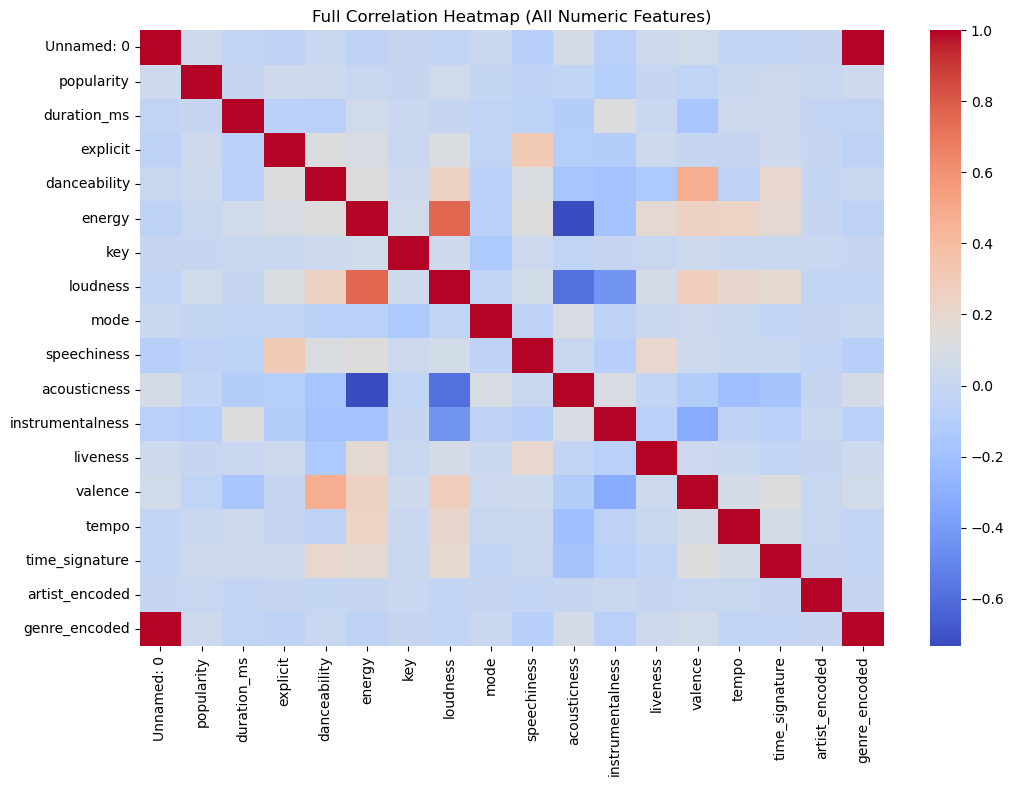

In [26]:
#  Ma trận tương quan toàn bộ dữ liệu số
corr_full = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_full, cmap="coolwarm", annot=False)
plt.title("Full Correlation Heatmap (All Numeric Features)")
plt.show()

####  Ma trận tương quan toàn bộ đặc trưng số (Full Correlation Heatmap)

- Ma trận tương quan tổng thể cho thấy đa số các đặc trưng có **tương quan yếu đến trung bình**, thể hiện bằng màu nhạt gần trung tính. Điều này cho thấy nhiều đặc trưng tương đối độc lập và có thể mang thông tin riêng biệt khi đưa vào mô hình.
- Một số cặp đặc trưng nổi bật có tương quan mạnh:
  - **`energy` ↔ `loudness` ≈ 0.76 (thuận mạnh):** bài hát năng lượng cao thường có âm lượng lớn hơn.
  - **`energy` ↔ `acousticness` ≈ -0.73 (nghịch mạnh):** nhạc acoustic thường có năng lượng thấp, trong khi nhạc điện tử hoặc rock có năng lượng cao hơn.
  - **`loudness` ↔ `acousticness` ≈ -0.59 (nghịch trung bình mạnh):** nhạc acoustic thường có âm lượng nhỏ hơn.
- Các cột như `artist_encoded` hay `genre_encoded` chỉ là nhãn mã hóa nên hệ số tương quan của chúng không có nhiều ý nghĩa âm học.
- Biến `popularity` có tương quan thấp với các đặc trưng âm học, gợi ý rằng độ phổ biến của bài hát không chỉ phụ thuộc vào đặc điểm âm nhạc mà còn bị chi phối bởi yếu tố bên ngoài như thời gian phát hành, nghệ sĩ hay xu hướng thị trường.


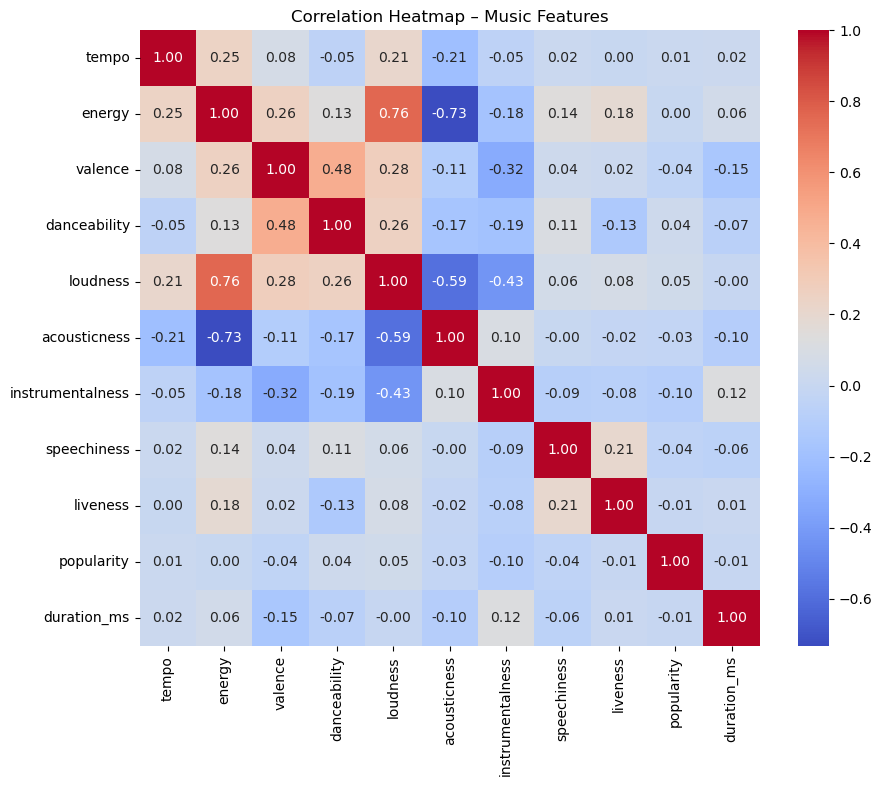

In [27]:
# Ma trận tương quan nhóm đặc trưng âm nhạc chính
music_features = ['tempo', 'energy', 'valence', 'danceability', 
                  'loudness', 'acousticness', 'instrumentalness', 
                  'speechiness', 'liveness', 'popularity', 'duration_ms']

corr_music = df[music_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_music, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap – Music Features")
plt.show()

####  Ma trận tương quan nhóm đặc trưng âm nhạc chính

Khi chỉ tập trung vào các đặc trưng âm nhạc cốt lõi (`tempo`, `energy`, `valence`, `danceability`, `loudness`, `acousticness`, `instrumentalness`, `speechiness`, `liveness`, `popularity`, `duration_ms`), các mối quan hệ thể hiện rõ ràng và có ý nghĩa hơn:

- **`energy` ↔ `loudness` ≈ 0.76 (thuận rất mạnh):** xác nhận rằng các bài hát sôi động có âm lượng cao hơn – điều quan trọng khi mô hình hóa phong cách nhạc.  
- **`energy` ↔ `acousticness` ≈ -0.73 (nghịch mạnh):** đặc trưng quan trọng để phân tách nhạc acoustic với nhạc điện tử/rock.  
- **`valence` ↔ `danceability` ≈ 0.48 (thuận trung bình):** bài hát có cảm xúc tích cực thường dễ nhảy – gợi ý tiềm năng để xây dựng hệ thống gợi ý dựa trên tâm trạng người dùng.  
- **`loudness` ↔ `instrumentalness` ≈ -0.43 (nghịch trung bình):** các bản nhạc không lời có xu hướng âm lượng thấp hơn.  
- **`valence` ↔ `instrumentalness` ≈ -0.32 (nghịch):** các bài instrumental thường có cảm xúc trung tính hoặc trầm hơn.

Ngoài ra, biến `popularity` tiếp tục thể hiện tương quan yếu với các đặc trưng âm nhạc, cho thấy cần thêm yếu tố bổ trợ nếu muốn dự đoán độ phổ biến của bài hát.



####  Kết luận và ý nghĩa đối với mô hình gợi ý

- Các đặc trưng có tương quan quá cao (đặc biệt là `energy` và `loudness`) có thể gây **đa cộng tuyến**, do đó chỉ nên giữ **một trong hai** khi xây dựng vector đặc trưng để mô hình hoạt động ổn định hơn.
- Các đặc trưng như `valence`, `danceability`, `acousticness` và `energy` mang thông tin quan trọng giúp mô hình hiểu rõ hơn về cảm xúc, phong cách và cấu trúc âm nhạc của bài hát.
- Phân tích tương quan là bước quan trọng để **loại bỏ đặc trưng trùng lặp**, **chọn biến hữu ích** và **định hướng xây dựng hệ thống gợi ý nhạc theo tâm trạng và sở thích người dùng** ở các bước tiếp theo.

 **Tóm lại**, việc phân tích ma trận tương quan không chỉ giúp chúng ta hiểu rõ mối quan hệ giữa các đặc trưng âm nhạc mà còn đóng vai trò nền tảng để thiết kế vector đặc trưng và tối ưu hóa mô hình gợi ý trong các tuần sau.

### Trích xuất Top 7 mối tương quan mạnh nhất

In [28]:
#  Trích xuất top 7 mối tương quan mạnh nhất
corr_pairs = (
    corr_music.where(np.triu(np.ones(corr_music.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
)

top7 = corr_pairs.reindex(corr_pairs.Correlation.abs().sort_values(ascending=False).index).head(7)
top7


,Feature A,Feature B,Correlation
12,energy,loudness,0.761690
13,energy,acousticness,-0.733908
34,loudness,acousticness,-0.589804
19,valence,danceability,0.477347
35,loudness,instrumentalness,-0.433478
22,valence,instrumentalness,-0.324310
20,valence,loudness,0.279851


###  Top 7 mối tương quan mạnh nhất giữa các đặc trưng âm nhạc

Bảng dưới đây thể hiện 7 cặp đặc trưng có mối tương quan tuyến tính mạnh nhất trong tập dữ liệu Spotify. Các hệ số tương quan dương gần 1 thể hiện mối quan hệ thuận mạnh, trong khi các giá trị âm gần -1 thể hiện mối quan hệ nghịch mạnh.

| Feature A           | Feature B           | Correlation | Nhận xét ý nghĩa |
|---------------------|---------------------|--------------|------------------|
| `energy`           | `loudness`          | **0.7617**   | Mối tương quan thuận rất mạnh: các bài hát có năng lượng cao thường có âm lượng lớn. Điều này phản ánh đặc tính tự nhiên của nhạc sôi động như EDM, pop hay rock. |
| `energy`           | `acousticness`      | **-0.7339**  | Mối tương quan nghịch rất mạnh: nhạc acoustic thường có năng lượng thấp, ngược lại nhạc điện tử hoặc rock có năng lượng cao hơn. |
| `loudness`         | `acousticness`      | **-0.5898**  | Mối tương quan nghịch trung bình mạnh: nhạc acoustic thường được ghi âm với âm lượng nhỏ hơn. |
| `valence`          | `danceability`      | **0.4773**   | Mối tương quan thuận trung bình: bài hát có cảm xúc tích cực thường dễ nhảy hơn. Đây là yếu tố quan trọng để mô hình gợi ý nhạc theo tâm trạng người dùng. |
| `loudness`         | `instrumentalness`  | **-0.4335**  | Mối tương quan nghịch trung bình: nhạc không lời có xu hướng có âm lượng thấp hơn các bài hát có lời. |
| `valence`          | `instrumentalness`  | **-0.3243**  | Mối tương quan nghịch: nhạc instrumental có xu hướng mang cảm xúc trung tính hoặc trầm hơn. |
| `valence`          | `loudness`          | **0.2799**   | Mối tương quan thuận yếu: bài hát có cảm xúc tích cực thường được sản xuất với âm lượng lớn hơn đôi chút. |

---

#### 📊 Nhận xét tổng quát:

- Nhóm đặc trưng **`energy` – `loudness` – `acousticness`** thể hiện mối liên hệ rất mạnh, phản ánh rõ rệt sự khác biệt giữa các thể loại nhạc sôi động và nhạc mộc.  
- Cặp **`valence` – `danceability`** là đặc trưng quan trọng để gợi ý nhạc dựa trên tâm trạng và trải nghiệm người dùng.  
- Các mối tương quan âm cho thấy các đặc điểm như “mức độ acoustic” hay “instrumentalness” thường đối lập với “năng lượng” và “âm lượng” – điều này có thể khai thác để mô hình phân tách các dòng nhạc khác nhau.  
- Một số đặc trưng có tương quan cao (**> 0.7**) như `energy` và `loudness` có thể gây đa cộng tuyến, nên cân nhắc chọn lọc khi xây dựng mô hình.

---

🎯 **Kết luận:**  
Phân tích top 7 mối tương quan mạnh nhất giúp xác định rõ các mối quan hệ cốt lõi giữa các đặc trưng âm nhạc. Kết quả này không chỉ hỗ trợ việc lựa chọn đặc trưng đầu vào mà còn cung cấp thông tin quan trọng để xây dựng mô hình gợi ý nhạc hiệu quả, chính xác và phù hợp với sở thích người dùng trong các bước tiếp theo.
